In [71]:
import numpy as np
import pandas as pd
import seaborn as sns

# ESTUDIO DE SALUD MENTAL

ESTE ESTUDIO MUESTRA EL PORCENTAJE DE POBLACIÓN QUE PADECE EL TRASTORNO MENTAL INDICADO (ESQUIZOFRENIA, DEPRESION, ANSIEDAD, BIPOLARIDAD Y DESORDEN ALIMENTICIO) EN DISTINTOS AÑOS. Es decir 0.223 = 0.223% = 0.223 personas de cada 100.

El estudio se ha realiado a ambos sexos y con una edad estandarizada

##  Paso1: Importado de datos


In [72]:
df=pd.read_csv("Data/1- mental-illnesses-prevalence.csv")

#cambio el nombre de las columnas que es muy largo
df = df.rename(columns={
    "Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized": "Schizophrenia",
    "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized": "Depression",
    "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized": "Anxiety",
    "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized": "Bipolar",
    "Eating disorders (share of population) - Sex: Both - Age: Age-standardized": "Eating"
})
df.head(20)
#Este es el formato del dataframe

,Entity,Code,Year,Schizophrenia,Depression,Anxiety,Bipolar,Eating
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
5,Afghanistan,AFG,1995,0.219409,4.978228,4.668100,0.699768,0.108507
6,Afghanistan,AFG,1996,0.218465,4.981489,4.665759,0.699650,0.105269
7,Afghanistan,AFG,1997,0.217286,4.987593,4.665013,0.699597,0.101531
8,Afghanistan,AFG,1998,0.216074,4.996858,4.668240,0.699765,0.098050
9,Afghanistan,AFG,1999,0.215068,5.004257,4.673557,0.700054,0.095723


## Paso 2: Limpieza de Datos

In [73]:
#datos sin nulos ni duplicados
df = df.dropna()
df = df.drop_duplicates()

## Paso 3.1: Análisis Compartido

DATOS INTERESANTES OBTENIDOS

In [74]:
#ultimo año registrado
ultimo_anio = df["Year"].max()
print("Último año disponible:", ultimo_anio)

Último año disponible: 2019


In [75]:
df_ultimoAnio = df[df["Year"] == ultimo_anio].copy()
print("Filas del último año:", len(df_ultimoAnio))

Filas del último año: 205


In [76]:
#Pais más alto, más bajo, media y mediana a nivel global
trastornos = ["Schizophrenia", "Depression", "Anxiety", "Bipolar", "Eating"]

In [77]:
for t in trastornos:
    fila_max = df_ultimoAnio.loc[df_ultimoAnio[t].idxmax()]
    fila_min = df_ultimoAnio.loc[df_ultimoAnio[t].idxmin()]

    print(f"\n {t}")
    print(f"   Mayor: {fila_max['Entity']} ({fila_max[t]:.6f})")
    print(f"   Menor: {fila_min['Entity']} ({fila_min[t]:.6f})")


 Schizophrenia
   Mayor: United States (0.433649)
   Menor: Somalia (0.188416)

 Depression
   Mayor: Uganda (6.584519)
   Menor: Brunei (1.603124)

 Anxiety
   Mayor: Portugal (8.027610)
   Menor: Uzbekistan (2.025655)

 Bipolar
   Mayor: New Zealand (1.506402)
   Menor: China (0.181807)

 Eating
   Mayor: Australia (1.031688)
   Menor: Somalia (0.045336)


In [78]:
for t in trastornos:
    media = df_ultimoAnio[t].mean()
    mediana = df_ultimoAnio[t].median()

    print(f"\n Estadísticas de {t}")
    print(f"  Media   : {media:.6f}")
    print(f"  Mediana : {mediana:.6f}")


 Estadísticas de Schizophrenia
  Media   : 0.267716
  Mediana : 0.275316

 Estadísticas de Depression
  Media   : 3.708473
  Mediana : 3.635117

 Estadísticas de Anxiety
  Media   : 4.154588
  Mediana : 4.016425

 Estadísticas de Bipolar
  Media   : 0.638947
  Mediana : 0.578562

 Estadísticas de Eating
  Media   : 0.213270
  Mediana : 0.161568


### Pasos para usar combinar esta DataFrame con otro

#### 3.1.1. Identificación de Entidades (paises) estudiadas en este DataFrame

In [79]:
#Aquí te voy a poner cuales son todas las Entidades (paises y más) que este Dataframe abarca con sus nombres especificos
entidades = df["Entity"].unique()
print(entidades)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Isr

#### 3.1.2. Paises europeos estudiados

In [80]:
#Te ahorro el trabajo y te hago un array de los paises Europeos que existen
TODOS_LOS_PAISES_DE_EUROPA = ["Albania", "Andorra", "Austria", "Belarus", "Belgium",
"Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
"Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
"Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania",
"Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands",
"North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia",
"San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden",
"Switzerland", "Ukraine", "United Kingdom", "Vatican City", "Europe Union (27)"] #Te meto también la Entidad de Union Europea que tiene

#Este Dataframe ya tiene todos los datos solo de los europeos
df_europeos = df[df["Entity"].isin(TODOS_LOS_PAISES_DE_EUROPA)]

EUROPEOS = df_europeos["Entity"].unique()
#Estos son los PAISES EUROPEOS que si están en el dataframe
print(EUROPEOS)

['Albania' 'Andorra' 'Austria' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova'
 'Monaco' 'Montenegro' 'Netherlands' 'North Macedonia' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Russia' 'San Marino' 'Serbia' 'Slovakia' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland' 'Ukraine' 'United Kingdom']


ANÁLISIS ADAPTADO A EUROPA

In [81]:
#MISMO ANÁLISIS PERO CON EUROPA
df_saludMentalEuropa2019 = df_europeos[df_europeos["Year"] == ultimo_anio].copy()
print("Último año disponible:", ultimo_anio)
print("Filas del último año:", len(df_saludMentalEuropa2019))

trastornos = [c for c in ["Schizophrenia", "Depression", "Anxiety", "Bipolar", "Eating"] if c in df_saludMentalEuropa2019.columns]

# 4) País con más/menos + media/mediana/moda por trastorno
for t in trastornos:
    # Convertir a numérico por si viniera como texto
    df_saludMentalEuropa2019[t] = pd.to_numeric(df_saludMentalEuropa2019[t], errors="coerce")

    # Quitar nulos para evitar errores con idxmax/idxmin
    s = df_saludMentalEuropa2019.dropna(subset=[t])

    fila_max = s.loc[s[t].idxmax()]
    fila_min = s.loc[s[t].idxmin()]

    media = s[t].mean()
    mediana = s[t].median()

    print(f"\n==================== {t} ====================")
    print(f" Mayor : {fila_max['Entity']} ({fila_max[t]:.6f})")
    print(f" Menor : {fila_min['Entity']} ({fila_min[t]:.6f})")
    print(f" Media   : {media:.6f}")

Último año disponible: 2019
Filas del último año: 42

==================== Schizophrenia ====================
 Mayor : Netherlands (0.367969)
 Menor : Denmark (0.241382)
 Media   : 0.283592

==================== Depression ====================
 Mayor : Greece (5.042251)
 Menor : Poland (2.277957)
 Media   : 3.438369

==================== Anxiety ====================
 Mayor : Portugal (8.027610)
 Menor : Poland (3.082497)
 Media   : 4.748171

==================== Bipolar ====================
 Mayor : United Kingdom (1.094477)
 Menor : Bulgaria (0.466398)
 Media   : 0.732582

==================== Eating ====================
 Mayor : Monaco (0.869913)
 Menor : Moldova (0.108443)
 Media   : 0.340618


In [82]:
traduccion_paises = {
    'Albania': 'Albania',
    'Andorra': 'Andorra',
    'Austria': 'Austria',
    'Belarus': 'Bielorrusia',
    'Belgium': 'Bélgica',
    'Bosnia and Herzegovina': 'Bosnia y Herzegovina',
    'Bulgaria': 'Bulgaria',
    'Croatia': 'Croacia',
    'Cyprus': 'Chipre',
    'Denmark': 'Dinamarca',
    'Estonia': 'Estonia',
    'Finland': 'Finlandia',
    'France': 'Francia',
    'Germany': 'Alemania',
    'Greece': 'Grecia',
    'Hungary': 'Hungría',
    'Iceland': 'Islandia',
    'Ireland': 'Irlanda',
    'Italy': 'Italia',
    'Latvia': 'Letonia',
    'Lithuania': 'Lituania',
    'Luxembourg': 'Luxemburgo',
    'Malta': 'Malta',
    'Moldova': 'Moldavia',
    'Monaco': 'Mónaco',
    'Montenegro': 'Montenegro',
    'Netherlands': 'Países Bajos',
    'North Macedonia': 'Macedonia del Norte',
    'Norway': 'Noruega',
    'Poland': 'Polonia',
    'Portugal': 'Portugal',
    'Romania': 'Rumanía',
    'Russia': 'Rusia',
    'San Marino': 'San Marino',
    'Serbia': 'Serbia',
    'Slovakia': 'Eslovaquia',
    'Slovenia': 'Eslovenia',
    'Spain': 'España',
    'Sweden': 'Suecia',
    'Switzerland': 'Suiza',
    'Ukraine': 'Ucrania',
    'United Kingdom': 'Reino Unido'
}
df_saludMentalEuropa2019['Entity'] = df_saludMentalEuropa2019['Entity'].replace(traduccion_paises)

df_saludMentalEuropa2019 = df_saludMentalEuropa2019.rename(columns={'Entity': 'country'})

df_saludMentalEuropa2019.head(20)
df_saludMentalEuropa2019.to_csv("dataframes_limpios/df_saludMentalEuropa2019.csv")
%store df_saludMentalEuropa2019

Stored 'df_saludMentalEuropa2019' (DataFrame)


# 3.1.3. Comandos de ayuda para mis compañeros

In [83]:
#Importante, os lo dejo preparado ya:
#1. Si quieres sacar TUS paises y almacenarlos en un array, usa este comando: misPaises = TU_DATAFRAME["Columna donde salgan tus paises"].unique()
#2. Si quieres quedarte De ESTE DATAFRAME solo con TUS paises usa: df_personalizado =df[df["Entity"].isin(misPaises)]
#3. Si no te funciona haz un array a mano de los paises que quieres comparar y lo sustituyes por misPaises y recuerda que están en inglés
#4. Si quieres sacar los paises europeos de TU DATAFRAME que ya están en ESTE DATAFRAME usa: df_perfe =TU_DATAFRAME["Columna donde salgan tus paises"].isin(EUROPEOS)]
#5. Si quieres usar solo los datos del ultimo año (2019): anio_mas_reciente = df_europeos["Year"].max() y luego: df_europeos_reciente = df_europeos[df_europeos["Year"] == anio_mas_reciente]

## 3.2 Análisis específico

### 3.2.1 ANÁLISIS DE ESPAÑA EN COMPARACIÓN DE EUROPA

In [84]:
trastornos = [
    "Schizophrenia",
    "Depression",
    "Anxiety",
    "Bipolar",
    "Eating"
]

df_media_europa = (
    df_europeos
    .groupby("Year")[trastornos]
    .mean()
    .reset_index()
)

In [85]:
df_media_long = df_media_europa.melt(
    id_vars="Year",
    value_vars=trastornos,
    var_name="Trastorno",
    value_name="Distribucion"
)

In [86]:
df_spain = df[df["Entity"] == "Spain"]

In [87]:
df_spain_long = df_spain.melt(
    id_vars="Year",
    value_vars=trastornos,
    var_name="Trastorno",
    value_name="Distribucion"
)

### 3.2.2 TOP 5 PAISES EUROPEOS POR TRASTORNO 

In [88]:
#Para este estudio solo quiero los años más recientes
anio_mas_reciente = df_europeos["Year"].max()
print(anio_mas_reciente)

2019


In [89]:
df_europeos_reciente = df_europeos[df_europeos["Year"] == anio_mas_reciente]

In [90]:
#DEPRESIÓN
top_depression = (
    df_europeos_reciente[["Entity", "Depression"]]
    .sort_values(by="Depression", ascending=False)
    .head(5)
)
print(top_depression)

        Entity  Depression
2279    Greece    5.042251
5399     Spain    4.704455
4649  Portugal    4.394066
2789   Ireland    4.216931
2069   Finland    4.139295


In [91]:
#ANSIEDAD
top_anxiety = (
    df_europeos_reciente[["Entity","Anxiety"]]
    .sort_values(by="Anxiety", ascending=False)
    .head(5)
)
print(top_anxiety)

           Entity   Anxiety
4649     Portugal  8.027610
2789      Ireland  6.907819
5549  Switzerland  6.790610
4049  Netherlands  6.754801
4319       Norway  6.735841


In [92]:
#ESQUIZOFRENIA
top_schizophrenia = (
    df_europeos_reciente[["Entity", "Schizophrenia"]]
    .sort_values(by="Schizophrenia", ascending=False)
    .head(5)
)
print(top_schizophrenia)

           Entity  Schizophrenia
4049  Netherlands       0.367969
2789      Ireland       0.352672
5219     Slovenia       0.299507
5189     Slovakia       0.295679
3779       Monaco       0.295402


In [93]:
#BIPOLARIDAD
top_bipolar = (
    df_europeos_reciente[["Entity", "Bipolar"]]
    .sort_values(by="Bipolar", ascending=False)
    .head(5)
)
print(top_bipolar)

              Entity   Bipolar
6059  United Kingdom  1.094477
5519          Sweden  0.973931
5549     Switzerland  0.941743
1589         Denmark  0.940294
209          Andorra  0.934813


In [94]:
#TRASTORNO ALIMENTICIO
top_eating = (
    df_europeos_reciente[["Entity","Eating"]]
    .sort_values(by="Eating", ascending=False)
    .head(5)
)
print(top_eating)

          Entity    Eating
3779      Monaco  0.869913
5399       Spain  0.590252
3389  Luxembourg  0.568823
419      Austria  0.562230
2849       Italy  0.544489


### 3.2.3 Evolución de trastornos de ansiedad y depresión

In [95]:
top5_anxiety_countries = top_anxiety["Entity"].tolist()
top5_depression_countries = top_depression["Entity"].tolist()

In [96]:
df_anxiety_evolution = df_europeos[
    df_europeos["Entity"].isin(top5_anxiety_countries)
]

df_depression_evolution = df_europeos[
    df_europeos["Entity"].isin(top5_depression_countries)
]

## Paso 4: Comunicacion de Datos y Visualización

## 4.1 EVOLUCION DE EUROPA Y COMPARACIÓN CON ESPAÑA

<Axes: xlabel='Year', ylabel='Distribucion'>

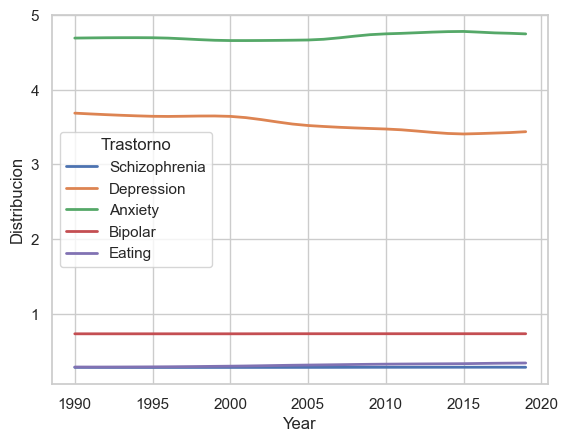

In [97]:
sns.lineplot(
    data=df_media_long,
    x="Year",
    y="Distribucion",
    hue="Trastorno",
    linewidth=2
)

<Axes: xlabel='Year', ylabel='Distribucion'>

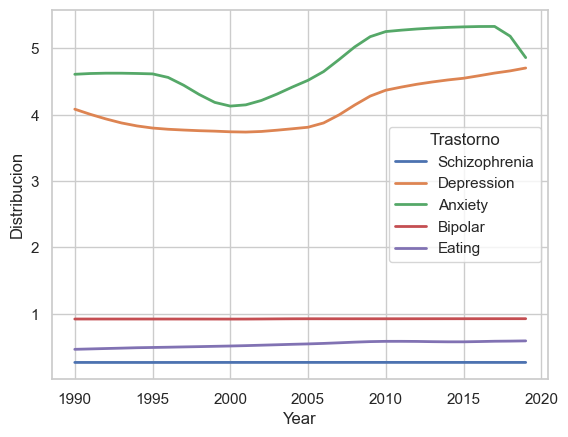

In [98]:
sns.lineplot(
    data=df_spain_long,
    x="Year",
    y="Distribucion",
    hue="Trastorno",
    linewidth=2
)

## 4.2 TOP PAISES EUROPEOS POR TRASTORNO

Text(0.5, 1.0, 'TOP 5 países europeos – Esquizofrenia')

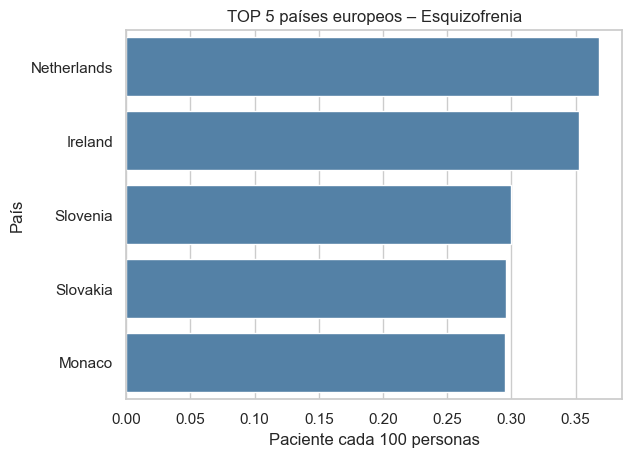

In [99]:
ax = sns.barplot(
    data=top_schizophrenia,
    x="Schizophrenia",
    y="Entity",
    color="steelblue"
)
ax.set_xlabel("Paciente cada 100 personas")
ax.set_ylabel("País")
ax.set_title("TOP 5 países europeos – Esquizofrenia")


Text(0.5, 1.0, 'TOP 5 países europeos – Depresión')

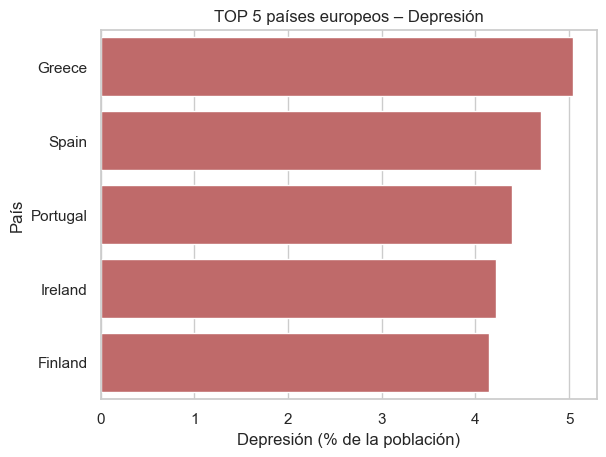

In [100]:
ax = sns.barplot(
    data=top_depression,
    x="Depression",
    y="Entity",
    color="indianred"
)
ax.set_xlabel("Depresión (% de la población)")
ax.set_ylabel("País")
ax.set_title("TOP 5 países europeos – Depresión")

Text(0.5, 1.0, 'TOP 5 países europeos – Ansiedad')

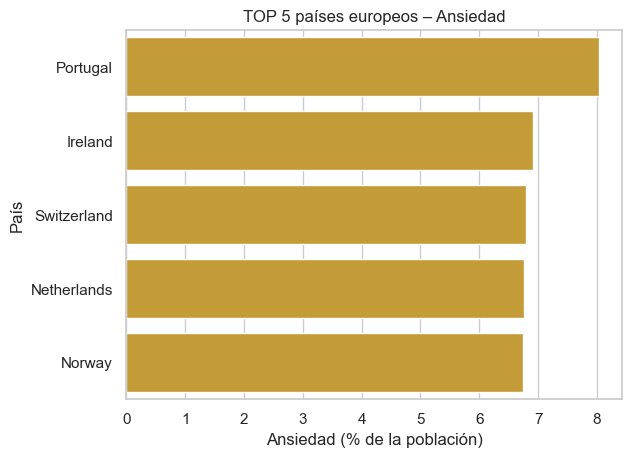

In [101]:
ax = sns.barplot(
    data=top_anxiety,
    x="Anxiety",
    y="Entity",
    color="goldenrod"
)
ax.set_xlabel("Ansiedad (% de la población)")
ax.set_ylabel("País")
ax.set_title("TOP 5 países europeos – Ansiedad")

Text(0.5, 1.0, 'TOP 5 países europeos – Trastorno bipolar')

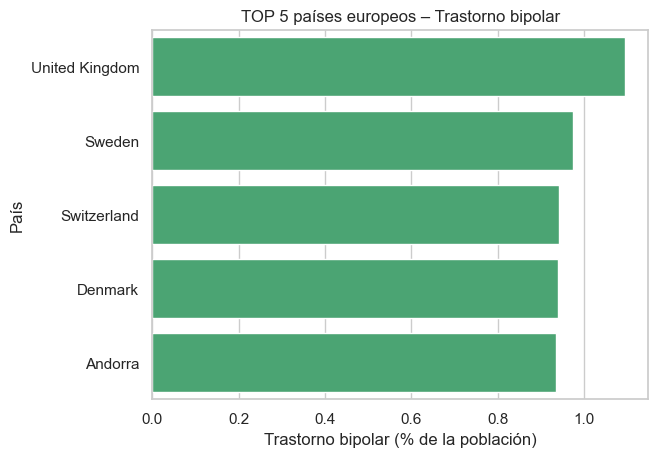

In [102]:
ax = sns.barplot(
    data=top_bipolar,
    x="Bipolar",
    y="Entity",
    color="mediumseagreen"
)
ax.set_xlabel("Trastorno bipolar (% de la población)")
ax.set_ylabel("País")
ax.set_title("TOP 5 países europeos – Trastorno bipolar")

Text(0.5, 1.0, 'TOP 5 países europeos – Trastornos alimentarios')

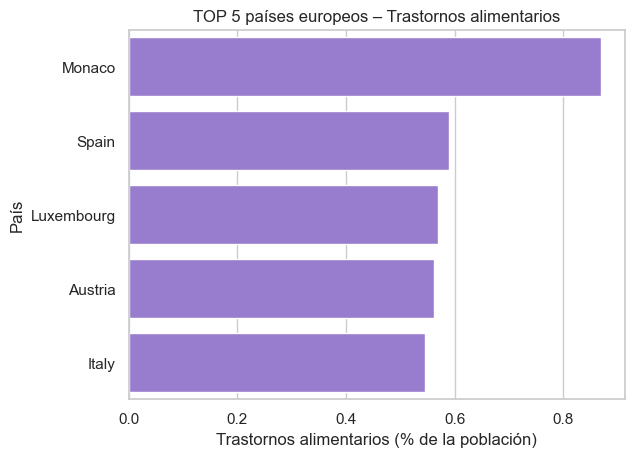

In [103]:
ax = sns.barplot(
    data=top_eating,
    x="Eating",
    y="Entity",
    color="mediumpurple"
)
ax.set_xlabel("Trastornos alimentarios (% de la población)")
ax.set_ylabel("País")
ax.set_title("TOP 5 países europeos – Trastornos alimentarios")

## 4.2 EVOLUCIÓN DE ANSIEDAD Y DEPRESIÓN EN TOP PAISES

Text(0.5, 1.0, 'Anxiety evolution – TOP 5 European countries')

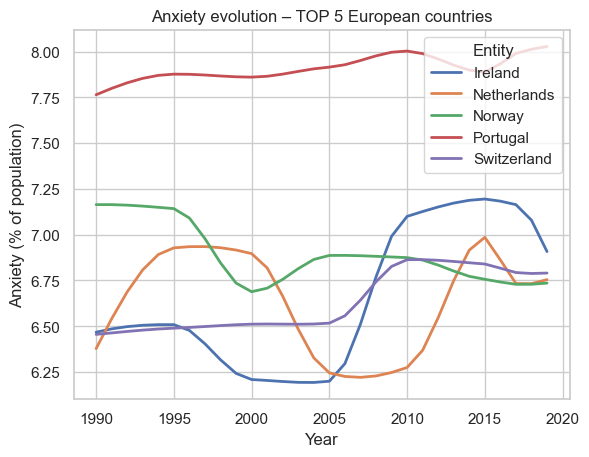

In [104]:
sns.set_theme(style="whitegrid")

ax = sns.lineplot(
    data=df_anxiety_evolution,
    x="Year",
    y="Anxiety",
    hue="Entity",
    linewidth=2
)

ax.set_ylabel("Anxiety (% of population)")
ax.set_xlabel("Year")
ax.set_title("Anxiety evolution – TOP 5 European countries")

Text(0.5, 1.0, 'Depression evolution – TOP 5 European countries')

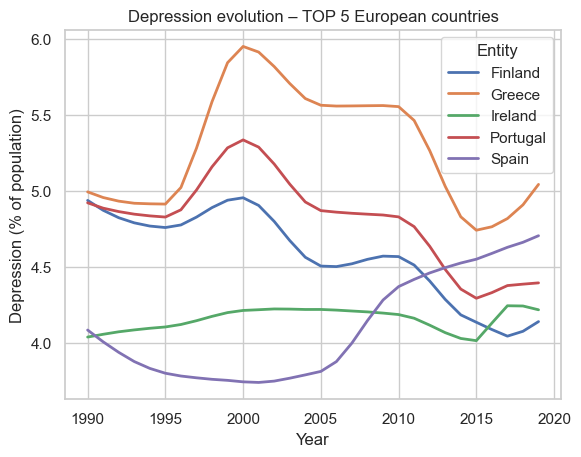

In [105]:
ax = sns.lineplot(
    data=df_depression_evolution,
    x="Year",
    y="Depression",
    hue="Entity",
    linewidth=2
)

ax.set_ylabel("Depression (% of population)")
ax.set_xlabel("Year")
ax.set_title("Depression evolution – TOP 5 European countries")